In [1]:
# Data management and investigation
import pandas as pd
import numpy as np
import missingno as msno
from plotnine import *
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

from functools import reduce

## Import data from each year

### 2019

In [2]:
# import 2019 reliability, net metering, energy efficiency, advanced metering infrastructure, demand response, and service territory raw_data
reliability_19 = pd.read_excel("raw_data/Reliability_2019.xlsx", 
                               header = 1)
net_metering_19 = pd.read_excel("raw_data/Net_Metering_2019.xlsx", 
                                header = [0,1,2])
efficiency_19 = pd.read_excel("raw_data/Energy_Efficiency_2019.xlsx", 
                              header = [0,1,2])
demand_response_19 = pd.read_excel("raw_data/Demand_Response_2019.xlsx", 
                              header = [0,1,2])
territory_19 = pd.read_excel("raw_data/Service_Territory_2019.xlsx")
utility_19 = pd.read_excel("raw_data/Sales_Ult_Cust_2019.xlsx", 
                                header = [0,1,2])
circuits_19 = pd.read_excel("raw_data/Distribution_Systems_2019.xlsx")
op_19 = pd.read_excel("raw_data/Operational_data_2019.xlsx", 
                                header = [0,1,2])

In [3]:
# Combine the headers together to describe each column
net_metering_19.columns = net_metering_19.columns.map(' - '.join)
efficiency_19.columns = efficiency_19.columns.map(' - '.join)
demand_response_19.columns = demand_response_19.columns.map(' - '.join)
utility_19.columns = utility_19.columns.map(' - '.join)
op_19.columns = op_19.columns.map(' - '.join)

In [4]:
# only grab the columns I want from each dataframe
reliability_19 = reliability_19[['Data Year',
                                 'Utility Number',
              'Utility Name', 
              'State', # control
              'Ownership', # control 
              'SAIDI Without MED',
              'SAIFI Without MED', 
              'CAIDI Without MED']].dropna()
reliability_19.columns = ['year','no', 'name', 'state','type','saidi_nomed', 'saifi_nomed', 'caidi_nomed']

In [5]:
op_19 = op_19[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
              'Utility Characteristics - Unnamed: 6_level_1 - NERC Region', 
              'Utility Characteristics - Unnamed: 4_level_1 - State',
              'Energy Sources (Megawatthours) - Unnamed: 9_level_1 - Net Generation',
              'Energy Sources (Megawatthours) - Unnamed: 10_level_1 - Wholesale Power Purchases' 
              ]].dropna()
op_19.columns = ['year','name','nerc','state','gen_mwh','purchase_mwh']

In [6]:
net_metering_19 = net_metering_19[['Utility Characteristics - Unnamed: 0_level_1 - Year',
                                   'Utility Characteristics - Unnamed: 3_level_1 - Utility Name',
                                   'Utility Characteristics - Unnamed: 1_level_1 - State',
                                   'Utility Characteristics - Unnamed: 5_level_1 - BA Code',
                'Photovoltaic - Energy Sold Back MWh - Total',
                'Wind - Energy Sold Back MWh - Total',
                'All Technologies - Energy Sold Back MWh - Total',
                ]].dropna()
net_metering_19.columns = ['year','name', 'state', 'ba','pv_mwh', 'wind_mwh', 'nm_mwh']

In [7]:
efficiency_19 = efficiency_19[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                               'Utility Characteristics - Unnamed: 4_level_1 - State',
                  'Reporting Year Incremental Annual Savings - Energy Savings (MWh) - Total']].dropna()
efficiency_19.columns = ['year','name','state','ee_mwh']

In [8]:
demand_response_19 = demand_response_19[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                         'Utility Characteristics - Unnamed: 4_level_1 - State',
                    'Yearly Energy and Demand Savings - Number of Customers Enrolled - Total',
                    'Yearly Energy and Demand Savings - Energy Savings (MWh) - Total']].dropna()
demand_response_19.columns = ['year','name', 'state','dem_res_customers', 'dem_res_mwh']

In [9]:
territory_19 = territory_19[['Data Year',
                             'Utility Name',
             'State',
             'County']]
territory_19.columns = ['year','name', 'state', 'county']

In [10]:
utility_19 = utility_19[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                         'Utility Characteristics - Unnamed: 6_level_1 - State',
                         'TOTAL - Sales - Megawatthours',
                         'TOTAL - Customers - Count']].dropna()
utility_19.columns = ['year','name', 'state','total_mwh','total_cust']

In [11]:
circuits_19 = circuits_19[['Data Year',
                           'Utility Name',
                           'State',
                           'Distribution Circuits',
                         'Circuits with Voltage Optimization']]
circuits_19.columns = ['year','name', 'state','circuits', 'voltage']

## 2018

In [12]:
# import 2018 reliability, net metering, energy efficiency, advanced metering infrastructure, demand response, and service territory raw_data
reliability_18 = pd.read_excel("raw_data/Reliability_2018.xlsx", 
                               header = 1)
net_metering_18 = pd.read_excel("raw_data/Net_Metering_2018.xlsx", 
                                header = [0,1,2])
efficiency_18 = pd.read_excel("raw_data/Energy_Efficiency_2018.xlsx", 
                              header = [0,1,2])
demand_response_18 = pd.read_excel("raw_data/Demand_Response_2018.xlsx", 
                              header = [0,1,2])
territory_18 = pd.read_excel("raw_data/Service_Territory_2018.xlsx")
utility_18 = pd.read_excel("raw_data/Sales_Ult_Cust_2018.xlsx", 
                                header = [0,1,2])
circuits_18 = pd.read_excel("raw_data/Distribution_Systems_2018.xlsx")
op_18 = pd.read_excel("raw_data/Operational_data_2018.xlsx", 
                                header = [0,1,2])

In [13]:
# Combine the headers together to describe each column
net_metering_18.columns = net_metering_18.columns.map(' - '.join)
efficiency_18.columns = efficiency_18.columns.map(' - '.join)
demand_response_18.columns = demand_response_18.columns.map(' - '.join)
utility_18.columns = utility_18.columns.map(' - '.join)
op_18.columns = op_18.columns.map(' - '.join)

In [14]:
# only grab the columns I want from each dataframe
reliability_18 = reliability_18[['Data Year',
                                 'Utility Number',
              'Utility Name', 
              'State', # control
              'Ownership', # control 
              'SAIDI Without MED',
              'SAIFI Without MED', 
              'CAIDI Without MED']].dropna()
reliability_18.columns = ['year','no', 'name', 'state','type','saidi_nomed', 'saifi_nomed', 'caidi_nomed']

In [15]:
op_18 = op_18[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
              'Utility Characteristics - Unnamed: 5_level_1 - NERC Region', 
              'Utility Characteristics - Unnamed: 3_level_1 - State',
              'Energy Sources (Megawatthours) - Unnamed: 8_level_1 - Net Generation',
              'Energy Sources (Megawatthours) - Unnamed: 9_level_1 - Wholesale Power Purchases' 
              ]].dropna()
op_18.columns = ['year','name','nerc','state','gen_mwh','purchase_mwh']

In [16]:
net_metering_18 = net_metering_18[['Utility Characteristics - Unnamed: 0_level_1 - Year',
                                   'Utility Characteristics - Unnamed: 3_level_1 - Utility Name',
                                   'Utility Characteristics - Unnamed: 1_level_1 - State',
                                   'Utility Characteristics - Unnamed: 4_level_1 - BA Code',
                'Photovoltaic - Energy Sold Back MWh - Total',
                'Wind - Energy Sold Back MWh - Total',
                'All Technologies - Energy Sold Back MWh - Total',
                ]].dropna()
net_metering_18.columns = ['year','name', 'state', 'ba','pv_mwh', 'wind_mwh', 'nm_mwh']

In [17]:
efficiency_18 = efficiency_18[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                               'Utility Characteristics - Unnamed: 3_level_1 - State',
                  'Reporting Year Incremental Annual Savings - Energy Savings (MWh) - Total']].dropna()
efficiency_18.columns = ['year','name','state','ee_mwh']

In [18]:
demand_response_18 = demand_response_18[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                         'Utility Characteristics - Unnamed: 3_level_1 - State',
                    'Yearly Energy and Demand Savings - Number of Customers Enrolled - Total',
                    'Yearly Energy and Demand Savings - Energy Savings (MWh) - Total']].dropna()
demand_response_18.columns = ['year','name', 'state','dem_res_customers', 'dem_res_mwh']

In [19]:
territory_18 = territory_18[['Data Year',
                             'Utility Name',
             'State',
             'County']]
territory_18.columns = ['year','name', 'state', 'county']

In [20]:
utility_18 = utility_18[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                         'Utility Characteristics - Unnamed: 6_level_1 - State',
                         'TOTAL - Sales - Megawatthours',
                         'TOTAL - Customers - Count']].dropna()
utility_18.columns = ['year','name', 'state','total_mwh','total_cust']

In [21]:
circuits_18 = circuits_18[['Data Year',
                           'Utility Name',
                           'State',
                           'Distribution Circuits',
                         'Circuits with Voltage Optimization']]
circuits_18.columns = ['year','name', 'state','circuits', 'voltage']

## 2017

In [22]:
# import 2017 reliability, net metering, energy efficiency, advanced metering infrastructure, demand response, and service territory raw_data
reliability_17 = pd.read_excel("raw_data/Reliability_2017.xlsx", 
                               header = 1)
net_metering_17 = pd.read_excel("raw_data/Net_Metering_2017.xlsx", 
                                header = [0,1,2])
efficiency_17 = pd.read_excel("raw_data/Energy_Efficiency_2017.xlsx", 
                              header = [0,1,2])
demand_response_17 = pd.read_excel("raw_data/Demand_Response_2017.xlsx", 
                              header = [0,1,2])
territory_17 = pd.read_excel("raw_data/Service_Territory_2017.xlsx")
utility_17 = pd.read_excel("raw_data/Sales_Ult_Cust_2017.xlsx", 
                                header = [0,1,2])
circuits_17 = pd.read_excel("raw_data/Distribution_Systems_2017.xlsx")
op_17 = pd.read_excel("raw_data/Operational_data_2017.xlsx", 
                                header = [0,1,2])

In [23]:
# Combine the headers together to describe each column
net_metering_17.columns = net_metering_17.columns.map(' - '.join)
efficiency_17.columns = efficiency_17.columns.map(' - '.join)
demand_response_17.columns = demand_response_17.columns.map(' - '.join)
utility_17.columns = utility_17.columns.map(' - '.join)
op_17.columns = op_17.columns.map(' - '.join)

In [24]:
# only grab the columns I want from each dataframe
reliability_17 = reliability_17[['Data Year',
                                 'Utility Number',
              'Utility Name', 
              'State', # control
              'Ownership', # control 
              'SAIDI Without MED',
              'SAIFI Without MED', 
              'CAIDI Without MED']].dropna()
reliability_17.columns = ['year','no', 'name', 'state','type','saidi_nomed', 'saifi_nomed', 'caidi_nomed']

In [25]:
op_17 = op_17[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
              'Utility Characteristics - Unnamed: 5_level_1 - NERC Region', 
              'Utility Characteristics - Unnamed: 3_level_1 - State',
              'Energy Sources (Megawatthours) - Unnamed: 8_level_1 - Net Generation',
              'Energy Sources (Megawatthours) - Unnamed: 9_level_1 - Wholesale Power Purchases' 
              ]].dropna()
op_17.columns = ['year','name','nerc','state','gen_mwh','purchase_mwh']

In [26]:
net_metering_17 = net_metering_17[['Utility Characteristics - Unnamed: 0_level_1 - Year',
                                   'Utility Characteristics - Unnamed: 3_level_1 - Utility Name',
                                   'Utility Characteristics - Unnamed: 1_level_1 - State',
                                   'Utility Characteristics - Unnamed: 4_level_1 - BA Code',
                'Photovoltaic - Energy Sold Back MWh - Total',
                'Wind - Energy Sold Back MWh - Total',
                'All Technologies - Energy Sold Back MWh - Total',
                ]].dropna()
net_metering_17.columns = ['year','name', 'state', 'ba','pv_mwh', 'wind_mwh', 'nm_mwh']

In [27]:
efficiency_17 = efficiency_17[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                               'Utility Characteristics - Unnamed: 3_level_1 - State',
                  'Reporting Year Incremental Annual Savings - Energy Savings (MWh) - Total']].dropna()
efficiency_17.columns = ['year','name','state','ee_mwh']

In [28]:
demand_response_17 = demand_response_17[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                         'Utility Characteristics - Unnamed: 3_level_1 - State',
                    'Yearly Energy and Demand Savings - Number of Customers Enrolled - Total',
                    'Yearly Energy and Demand Savings - Energy Savings (MWh) - Total']].dropna()
demand_response_17.columns = ['year','name', 'state','dem_res_customers', 'dem_res_mwh']

In [29]:
territory_17 = territory_17[['Data Year',
                             'Utility Name',
             'State',
             'County']]
territory_17.columns = ['year','name', 'state', 'county']

In [30]:
utility_17 = utility_17[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                         'Utility Characteristics - Unnamed: 6_level_1 - State',
                         'TOTAL - Sales - Megawatthours',
                         'TOTAL - Customers - Count']].dropna()
utility_17.columns = ['year','name', 'state','total_mwh','total_cust']

In [31]:
circuits_17 = circuits_17[['Data Year',
                           'Utility Name',
                           'State',
                           'Distribution Circuits',
                         'Circuits with Voltage Optimization']]
circuits_17.columns = ['year','name', 'state','circuits', 'voltage']

## 2016

In [32]:
# import 2016 reliability, net metering, energy efficiency, advanced metering infrastructure, demand response, and service territory raw_data
reliability_16 = pd.read_excel("raw_data/Reliability_2016.xlsx", 
                               header = 1)
net_metering_16 = pd.read_excel("raw_data/Net_Metering_2016.xlsx", 
                                header = [0,1,2,3])
efficiency_16 = pd.read_excel("raw_data/Energy_Efficiency_2016.xlsx", 
                              header = [0,1,2])
demand_response_16 = pd.read_excel("raw_data/Demand_Response_2016.xlsx", 
                              header = [0,1,2])
territory_16 = pd.read_excel("raw_data/Service_Territory_2016.xlsx")
utility_16 = pd.read_excel("raw_data/Sales_Ult_Cust_2016.xlsx", 
                                header = [0,1,2])
circuits_16 = pd.read_excel("raw_data/Distribution_Systems_2016.xlsx")
op_16 = pd.read_excel("raw_data/Operational_data_2016.xlsx", 
                                header = [0,1,2])

In [33]:
# Combine the headers together to describe each column
net_metering_16.columns = net_metering_16.columns.map(' - '.join)
efficiency_16.columns = efficiency_16.columns.map(' - '.join)
demand_response_16.columns = demand_response_16.columns.map(' - '.join)
utility_16.columns = utility_16.columns.map(' - '.join)
op_16.columns = op_16.columns.map(' - '.join)

In [34]:
# only grab the columns I want from each dataframe
reliability_16 = reliability_16[['Data Year',
                                 'Utility Number',
              'Utility Name', 
              'State', # control
              'Ownership', # control 
              'SAIDI Without MED',
              'SAIFI Without MED', 
              'CAIDI Without MED']].dropna()
reliability_16.columns = ['year','no', 'name', 'state','type','saidi_nomed', 'saifi_nomed', 'caidi_nomed']

In [35]:
op_16 = op_16[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
              'Utility Characteristics - Unnamed: 5_level_1 - NERC Region', 
              'Utility Characteristics - Unnamed: 3_level_1 - State',
              'Energy Sources (Megawatthours) - Unnamed: 8_level_1 - Net Generation',
              'Energy Sources (Megawatthours) - Unnamed: 9_level_1 - Wholesale Power Purchases' 
              ]].dropna()
op_16.columns = ['year','name','nerc','state','gen_mwh','purchase_mwh']

In [36]:
net_metering_16 = net_metering_16[['Utility Level Data - States - Utility Characteristics - Unnamed: 0_level_2 - Year',
                                   'Utility Level Data - States - Utility Characteristics - Unnamed: 3_level_2 - Utility Name',
                                   'Utility Level Data - States - Utility Characteristics - Unnamed: 1_level_2 - State',
               'Utility Level Data - States - Photovoltaic - Energy Sold Back MWh - Total',
                'Utility Level Data - States - Wind - Energy Sold Back MWh - Total',
                'Utility Level Data - States - All Technologies - Energy Sold Back MWh - Total',
                ]].dropna()
net_metering_16.columns = ['year','name', 'state','pv_mwh', 'wind_mwh', 'nm_mwh']

In [37]:
efficiency_16 = efficiency_16[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                               'Utility Characteristics - Unnamed: 3_level_1 - State',
                  'Reporting Year Incremental Annual Savings - Energy Savings (MWh) - Total']].dropna()
efficiency_16.columns = ['year','name','state','ee_mwh']

In [38]:
demand_response_16 = demand_response_16[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                         'Utility Characteristics - Unnamed: 3_level_1 - State',
                    'Yearly Energy and Demand Savings - Number of Customers Enrolled - Total',
                    'Yearly Energy and Demand Savings - Energy Savings (MWh) - Total']].dropna()
demand_response_16.columns = ['year','name', 'state','dem_res_customers', 'dem_res_mwh']

In [39]:
territory_16 = territory_16[['Data Year',
                             'Utility Name',
             'State',
             'County']]
territory_16.columns = ['year','name', 'state', 'county']

In [40]:
utility_16 = utility_16[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                         'Utility Characteristics - Unnamed: 6_level_1 - State',
                         'TOTAL - Sales - Megawatthours',
                         'TOTAL - Customers - Count']].dropna()
utility_16.columns = ['year','name', 'state','total_mwh','total_cust']

In [41]:
circuits_16 = circuits_16[['Data Year',
                           'Utility Name',
                           'State',
                           'Distribution Circuits',
                         'Circuits with Voltage Optimization']]
circuits_16.columns = ['year','name', 'state','circuits', 'voltage']

## 2015

In [42]:
# import 2015 reliability, net metering, energy efficiency, advanced metering infrastructure, demand response, and service territory raw_data
reliability_15 = pd.read_excel("raw_data/Reliability_2015.xlsx", 
                               header = 1)
net_metering_15 = pd.read_excel("raw_data/Net_Metering_2015.xlsx", 
                                header = [0,1,2])
efficiency_15 = pd.read_excel("raw_data/Energy_Efficiency_2015.xlsx", 
                              header = [0,1,2])
demand_response_15 = pd.read_excel("raw_data/Demand_Response_2015.xlsx", 
                              header = [0,1,2])
territory_15 = pd.read_excel("raw_data/Service_Territory_2015.xlsx")
utility_15 = pd.read_excel("raw_data/Sales_Ult_Cust_2015.xlsx", 
                                header = [0,1,2])
circuits_15 = pd.read_excel("raw_data/Distribution_Systems_2015.xlsx")
op_15 = pd.read_excel("raw_data/Operational_data_2015.xlsx", 
                                header = [0,1,2])

In [43]:
# Combine the headers together to describe each column
net_metering_15.columns = net_metering_15.columns.map(' - '.join)
efficiency_15.columns = efficiency_15.columns.map(' - '.join)
demand_response_15.columns = demand_response_15.columns.map(' - '.join)
utility_15.columns = utility_15.columns.map(' - '.join)
op_15.columns = op_15.columns.map(' - '.join)

In [44]:
# only grab the columns I want from each dataframe
reliability_15 = reliability_15[['Data Year',
                                 'Utility Number',
              'Utility Name', 
              'State', # control
              'Ownership', # control 
              'SAIDI Without MED',
              'SAIFI Without MED', 
              'CAIDI Without MED']].dropna()
reliability_15.columns = ['year','no', 'name', 'state','type','saidi_nomed', 'saifi_nomed', 'caidi_nomed']

In [45]:
op_15 = op_15[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
              'Utility Characteristics - Unnamed: 5_level_1 - NERC Region', 
              'Utility Characteristics - Unnamed: 3_level_1 - State',
              'Energy Sources (Megawatthours) - Unnamed: 8_level_1 - Net Generation',
              'Energy Sources (Megawatthours) - Unnamed: 9_level_1 - Wholesale Power Purchases' 
              ]].dropna()
op_15.columns = ['year','name','nerc','state','gen_mwh','purchase_mwh']

In [46]:
net_metering_15 = net_metering_15[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                   'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                   'Utility Characteristics - Unnamed: 3_level_1 - State',
                                   'Photovoltaic - Energy Sold Back MWh - Total',
                'Wind - Energy Sold Back MWh - Total',
                'Total - Energy Sold Back MWh - Total',
                ]].dropna()
net_metering_15.columns = ['year','name', 'state','pv_mwh', 'wind_mwh', 'nm_mwh']

In [47]:
efficiency_15 = efficiency_15[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                               'Utility Characteristics - Unnamed: 3_level_1 - State',
                  'Reporting Year Incremental Annual Savings - Energy Savings (MWh) - Total']].dropna()
efficiency_15.columns = ['year','name','state','ee_mwh']

In [48]:
demand_response_15 = demand_response_15[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                         'Utility Characteristics - Unnamed: 3_level_1 - State',
                    'Yearly Energy and Demand Savings - Number of Customers Enrolled - Total',
                    'Yearly Energy and Demand Savings - Energy Savings (MWh) - Total']].dropna()
demand_response_15.columns = ['year','name', 'state','dem_res_customers', 'dem_res_mwh']

In [49]:
territory_15 = territory_15[['Data Year',
                             'Utility Name',
             'State',
             'County']]
territory_15.columns = ['year','name', 'state', 'county']

In [50]:
utility_15 = utility_15[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                         'Utility Characteristics - Unnamed: 6_level_1 - State',
                         'TOTAL - Sales - Megawatthours',
                         'TOTAL - Customers - Count']].dropna()
utility_15.columns = ['year','name', 'state','total_mwh','total_cust']

In [51]:
circuits_15 = circuits_15[['Data Year',
                           'Utility Name',
                           'State',
                           'Distribution Circuits',
                         'Circuits with Voltage Optimization']]
circuits_15.columns = ['year','name', 'state','circuits', 'voltage']

## 2014

In [52]:
# import 2014 reliability, net metering, energy efficiency, advanced metering infrastructure, demand response, and service territory raw_data
reliability_14 = pd.read_excel("raw_data/Reliability_2014.xlsx", 
                               header = 1)
net_metering_14 = pd.read_excel("raw_data/Net_Metering_2014.xls", 
                                header = [0,1,2])
efficiency_14 = pd.read_excel("raw_data/Energy_Efficiency_2014.xlsx", 
                              header = [0,1,2])
demand_response_14 = pd.read_excel("raw_data/Demand_Response_2014.xls", 
                              header = [0,1,2])
territory_14 = pd.read_excel("raw_data/Service_Territory_2014.xls")
utility_14 = pd.read_excel("raw_data/Sales_Ult_Cust_2014.xls", 
                                header = [0,1,2])
circuits_14 = pd.read_excel("raw_data/Distribution_Systems_2014.xls")
op_14 = pd.read_excel("raw_data/Operational_data_2014.xlsx", 
                                header = [0,1,2])

In [53]:
# Combine the headers together to describe each column
net_metering_14.columns = net_metering_14.columns.map(' - '.join)
efficiency_14.columns = efficiency_14.columns.map(' - '.join)
demand_response_14.columns = demand_response_14.columns.map(' - '.join)
utility_14.columns = utility_14.columns.map(' - '.join)
op_14.columns = op_14.columns.map(' - '.join)

In [54]:
# only grab the columns I want from each dataframe
reliability_14 = reliability_14[['Data Year',
                                 'Utility Number',
              'Utility Name', 
              'State', # control
              'Ownership', # control 
              'SAIDI Without MED',
              'SAIFI Without MED', 
              'CAIDI Without MED']].dropna()
reliability_14.columns = ['year','no', 'name', 'state','type','saidi_nomed', 'saifi_nomed', 'caidi_nomed']

In [55]:
op_14 = op_14[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
              'Utility Characteristics - Unnamed: 5_level_1 - NERC Region', 
              'Utility Characteristics - Unnamed: 3_level_1 - State',
              'Energy Sources (Megawatthours) - Unnamed: 8_level_1 - Net Generation',
              'Energy Sources (Megawatthours) - Unnamed: 9_level_1 - Wholesale Power Purchases' 
              ]].dropna()
op_14.columns = ['year','name','nerc','state','gen_mwh','purchase_mwh']

In [56]:
net_metering_14 = net_metering_14[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                   'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                   'Utility Characteristics - Unnamed: 3_level_1 - State',
                                   'Photovoltaic - Energy Sold Back MWh - Total',
                'Wind - Energy Sold Back MWh - Total',
                'Total - Energy Sold Back MWh - Total',
                ]].dropna()
net_metering_14.columns = ['year','name', 'state','pv_mwh', 'wind_mwh', 'nm_mwh']

In [57]:
efficiency_14 = efficiency_14[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                               'Utility Characteristics - Unnamed: 3_level_1 - State',
                  'Reporting Year Incremental Annual Savings - Energy Savings (MWh) - Total']].dropna()
efficiency_14.columns = ['year','name','state','ee_mwh']

In [58]:
demand_response_14 = demand_response_14[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                         'Utility Characteristics - Unnamed: 3_level_1 - State',
                    'Yearly Energy and Demand Savings - Number of Customers Enrolled - Total',
                    'Yearly Energy and Demand Savings - Energy Savings (MWh) - Total']].dropna()
demand_response_14.columns = ['year','name', 'state','dem_res_customers', 'dem_res_mwh']

In [59]:
territory_14 = territory_14[['Data Year',
                             'Utility Name',
             'State',
             'County']]
territory_14.columns = ['year','name', 'state', 'county']

In [60]:
utility_14 = utility_14[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                         'Utility Characteristics - Unnamed: 6_level_1 - State',
                         'TOTAL - Sales - Megawatthours',
                         'TOTAL - Customers - Count']].dropna()
utility_14.columns = ['year','name', 'state','total_mwh','total_cust']

In [61]:
circuits_14 = circuits_14[['Data Year',
                           'Utility Name',
                           'State',
                           'Distribution Circuits',
                         'Circuits with Voltage Optimization']]
circuits_14.columns = ['year','name', 'state','circuits', 'voltage']

## 2013

In [62]:
# import 2013 reliability, net metering, energy efficiency, advanced metering infrastructure, demand response, and service territory raw_data
reliability_13 = pd.read_excel("raw_data/Reliability_2013.xlsx", 
                               header = 1)
net_metering_13 = pd.read_excel("raw_data/Net_Metering_2013.xls", 
                                header = [0,1,2])
efficiency_13 = pd.read_excel("raw_data/Energy_Efficiency_2013.xlsx", 
                              header = [0,1,2])
demand_response_13 = pd.read_excel("raw_data/Demand_Response_2013.xls", 
                              header = [0,1,2])
territory_13 = pd.read_excel("raw_data/Service_Territory_2013.xls")
utility_13 = pd.read_excel("raw_data/Sales_Ult_Cust_2013.xls", 
                                header = [0,1,2])
circuits_13 = pd.read_excel("raw_data/Distribution_Systems_2013.xls")
op_13 = pd.read_excel("raw_data/Operational_data_2013.xlsx", 
                                header = [0,1,2])

In [63]:
# Combine the headers together to describe each column
net_metering_13.columns = net_metering_13.columns.map(' - '.join)
efficiency_13.columns = efficiency_13.columns.map(' - '.join)
demand_response_13.columns = demand_response_13.columns.map(' - '.join)
utility_13.columns = utility_13.columns.map(' - '.join)
op_13.columns = op_13.columns.map(' - '.join)

In [64]:
# only grab the columns I want from each dataframe
reliability_13 = reliability_13[['Data Year',
                                 'Utility Number',
              'Utility Name', 
              'State', # control
              'Ownership', # control 
              'SAIDI Without MED',
              'SAIFI Without MED', 
              'CAIDI Without MED']].dropna()
reliability_13.columns = ['year','no', 'name', 'state','type','saidi_nomed', 'saifi_nomed', 'caidi_nomed']

In [65]:
op_13 = op_13[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
              'Utility Characteristics - Unnamed: 5_level_1 - NERC Region', 
              'Utility Characteristics - Unnamed: 3_level_1 - State',
              'Energy Sources (Megawatthours) - Unnamed: 8_level_1 - Net Generation',
              'Energy Sources (Megawatthours) - Unnamed: 9_level_1 - Wholesale Power Purchases' 
              ]].dropna()
op_13.columns = ['year','name','nerc','state','gen_mwh','purchase_mwh']

In [66]:
net_metering_13 = net_metering_13[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                   'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                   'Utility Characteristics - Unnamed: 3_level_1 - State',
                                   'Photovoltaic - Energy Sold Back MWh - Total',
                'Wind - Energy Sold Back MWh - Total',
                'Total - Energy Sold Back MWh - Total',
                ]].dropna()
net_metering_13.columns = ['year','name', 'state','pv_mwh', 'wind_mwh', 'nm_mwh']

In [67]:
efficiency_13 = efficiency_13[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                               'Utility Characteristics - Unnamed: 3_level_1 - State',
                  'Reporting Year Incremental Annual Savings - Energy Savings (MWh) - Total']].dropna()
efficiency_13.columns = ['year','name','state','ee_mwh']

In [68]:
demand_response_13 = demand_response_13[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                         'Utility Characteristics - Unnamed: 3_level_1 - State',
                    'Yearly Energy and Demand Savings - Number of Customers Enrolled - Total',
                    'Yearly Energy and Demand Savings - Energy Savings (MWh) - Total']].dropna()
demand_response_13.columns = ['year','name', 'state','dem_res_customers', 'dem_res_mwh']

In [69]:
territory_13 = territory_13[['Data Year',
                             'Utility Name',
             'State',
             'County']]
territory_13.columns = ['year','name', 'state', 'county']

In [70]:
utility_13 = utility_13[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                         'Utility Characteristics - Unnamed: 6_level_1 - State',
                         'TOTAL - Sales - Megawatthours',
                         'TOTAL - Customers - Count']].dropna()
utility_13.columns = ['year','name', 'state','total_mwh','total_cust']

In [71]:
circuits_13 = circuits_13[['Data Year',
                           'Utility Name',
                           'State',
                           'Distribution Circuits',
                         'Circuits with Voltage Optimization']]
circuits_13.columns = ['year','name', 'state','circuits', 'voltage']

# Merge all datasets

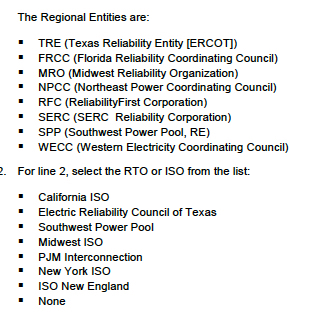

In [72]:
%who DataFrame

circuits_13	 circuits_14	 circuits_15	 circuits_16	 circuits_17	 circuits_18	 circuits_19	 demand_response_13	 demand_response_14	 
demand_response_15	 demand_response_16	 demand_response_17	 demand_response_18	 demand_response_19	 efficiency_13	 efficiency_14	 efficiency_15	 efficiency_16	 
efficiency_17	 efficiency_18	 efficiency_19	 net_metering_13	 net_metering_14	 net_metering_15	 net_metering_16	 net_metering_17	 net_metering_18	 
net_metering_19	 op_13	 op_14	 op_15	 op_16	 op_17	 op_18	 op_19	 reliability_13	 
reliability_14	 reliability_15	 reliability_16	 reliability_17	 reliability_18	 reliability_19	 territory_13	 territory_14	 territory_15	 
territory_16	 territory_17	 territory_18	 territory_19	 utility_13	 utility_14	 utility_15	 utility_16	 utility_17	 
utility_18	 utility_19	 


In [74]:
# all of our datasets into onee list
df_list = [circuits_13, circuits_14, circuits_15, circuits_16, circuits_17, circuits_18, circuits_19, demand_response_13, demand_response_14, 
demand_response_15, demand_response_16, demand_response_17, demand_response_18, demand_response_19, efficiency_13, efficiency_14, efficiency_15, efficiency_16, efficiency_17, efficiency_18, 
efficiency_19, net_metering_13, net_metering_14, net_metering_15, net_metering_16, net_metering_17, net_metering_18, net_metering_19, op_13, 
op_14, op_15, op_16, op_17, op_18, op_19, reliability_13, reliability_14, reliability_15, 
reliability_16, reliability_17, reliability_18, reliability_19, territory_13, territory_14, territory_15, territory_16, territory_17, 
territory_18, territory_19, utility_13, utility_14, utility_15, utility_16, utility_17, utility_18, utility_19,]

In [75]:
# merge all the lists together by utility name 
df_list_19 = [utility_19, reliability_19, circuits_19, op_19, net_metering_19, efficiency_19, demand_response_19]
df_19 = reduce(lambda left,right: pd.merge(left,right,on=['name','state','year'], how='outer'), df_list_19)

In [76]:
df_list_18 = [utility_18, reliability_18, circuits_18, op_18, net_metering_18, efficiency_18, demand_response_18]
df_18 = reduce(lambda left,right: pd.merge(left,right,on=['name','state','year'], how='outer'), df_list_18)

In [77]:
df_list_17 = [utility_17, reliability_17, circuits_17, op_17, net_metering_17, efficiency_17, demand_response_17]
df_17 = reduce(lambda left,right: pd.merge(left,right,on=['name','state','year'], how='outer'), df_list_17)

In [78]:
df_list_16 = [utility_16, reliability_16, circuits_16, op_16, net_metering_16, efficiency_16, demand_response_16]
df_16 = reduce(lambda left,right: pd.merge(left,right,on=['name','state','year'], how='outer'), df_list_16)

In [79]:
df_list_15 = [utility_15, reliability_15, circuits_15, op_15, net_metering_15, efficiency_15, demand_response_15]
df_15 = reduce(lambda left,right: pd.merge(left,right,on=['name','state','year'], how='outer'), df_list_15)

In [80]:
df_list_14 = [utility_14, reliability_14, circuits_14, op_14, net_metering_14, efficiency_14, demand_response_14]
df_14 = reduce(lambda left,right: pd.merge(left,right,on=['name','state','year'], how='outer'), df_list_14)

In [81]:
df_list_13 = [utility_13, reliability_13, circuits_13, op_13, net_metering_13, efficiency_13, demand_response_13]
df_13 = reduce(lambda left,right: pd.merge(left,right,on=['name','state','year'], how='outer'), df_list_13)

### Join all datasets together to create large dataset with all years

In [259]:
df = df_19.append([df_18,df_17,df_16,df_15, df_14, df_13])

In [260]:
# how many states are there?
## confusde because there is both a CT and CN - are they both Connecticut??
df.state.unique()

array(['SC', 'MS', 'LA', 'MD', 'VA', 'MN', 'IL', 'WI', 'NY', 'PA', 'OH',
       'GA', 'IA', 'IN', 'AZ', 'NV', 'AK', 'AL', 'FL', 'NC', 'CA', 'MO',
       'ID', 'KS', 'OK', 'MI', 'NE', 'WA', 'TX', 'TN', 'KY', 'WV', 'AR',
       'SD', 'MA', 'NH', 'OR', 'CO', 'NJ', 'NM', 'ME', 'VT', 'ND', 'WY',
       'MT', 'UT', 'DE', 'RI', 'CT', 'DC', 'HI', 'CN'], dtype=object)

# Data cleaning

In [261]:
# drop the duplicate rows 
df = df[~df.duplicated(['name', 'state','year'])]

In [262]:
# drop all the entries where my outcome variable is not present (SAIDI, SAIFI and CAIDI are same – I checked)
df = df[~df.saidi_nomed.isna()]

In [263]:
# remove those missing total customer data and total megawatthours or nerc region
df = df[~df.total_mwh.isna()]
# df = df[~df.total_cust.isna()] not necessary because same missing as total mwh
df = df[~df.nerc.isna()]

In [264]:
df.isna().sum()

year                    0
name                    0
state                   0
total_mwh               0
total_cust              0
no                      0
type                    0
saidi_nomed             0
saifi_nomed             0
caidi_nomed             0
circuits                3
voltage                 3
nerc                    0
gen_mwh                 0
purchase_mwh            0
ba                   4424
pv_mwh               1868
wind_mwh             1868
nm_mwh               1868
ee_mwh               4120
dem_res_customers    4760
dem_res_mwh          4760
dtype: int64

In [278]:
df_msno=df.filter(['saidi_nomed','pv_mwh','wind_mwh', 'nm_mwh','ee_mwh','dem_res_mwh','dem_res_customers'])

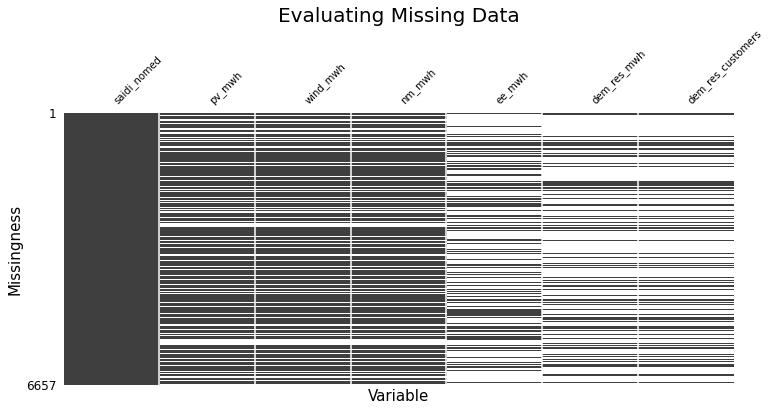

In [320]:

msno.matrix(df_msno, sparkline=False, figsize=(12,5), fontsize=10)
plt.xlabel('Variable', fontsize=15)
plt.ylabel('Missingness', fontsize=15)
plt.xticks(rotation=45) 

plt.title("Evaluating Missing Data", fontsize= 20)
plt.savefig('./deliverables/msno.png', bbox_inches="tight")

In [108]:
# make a copy for the alternative method before filling all the 0's
df_nona = df.copy()

#### Attempt 4.5: make another dataframe only dropping the non-net metering predictors with high missingness

This includes the energy efficiency and demand response preditcors (they had 61.9% and 71.5% missingness, respecively).

In [192]:
df_nm = df.copy().drop(columns=['ba','ee_mwh','dem_res_customers', 'dem_res_mwh'])

#### Fill NA's with 0

In [109]:
# fill na's with 0 
# i assume that if they didn't fill it out, there is nothing to report
# i filled ba code even though that's incorrect because i ended up not using it
df = df.fillna(0).reset_index(drop=True)

### Try alternative method where I drop NA's for all columns

#### Drop BA code column since I don't end up using it anyway

In [110]:
df_nona = df_nona.drop(columns='ba')

In [111]:
# still all states
len(df_nona.state.unique())

51

In [112]:
df_nona.isna().sum(axis=0)

year                    0
name                    0
state                   0
total_mwh               0
total_cust              0
no                      0
type                    0
saidi_nomed             0
saifi_nomed             0
caidi_nomed             0
circuits                3
voltage                 3
nerc                    0
gen_mwh                 0
purchase_mwh            0
pv_mwh               1868
wind_mwh             1868
nm_mwh               1868
ee_mwh               4120
dem_res_customers    4760
dem_res_mwh          4760
dtype: int64

In [234]:
# drop all rows where there is a missing value in the subset columns
df_nona = df_nona.dropna(axis=0, subset = ['nm_mwh', 'ee_mwh','dem_res_customers','circuits','voltage'])

In [235]:
df_nona['pv_pct'] = ((df_nona['pv_mwh']/df_nona['total_mwh']) * 100).fillna(0)

In [236]:
df_nona['wind_pct'] = ((df_nona['wind_mwh']/df_nona['total_mwh']) * 100).fillna(0)

In [237]:
df_nona['nm_pct'] = ((df_nona['nm_mwh']/df_nona['total_mwh']) * 100).fillna(0)

In [238]:
# change periods to 0 
df_nona.loc[df_nona["ee_mwh"] == ".", 'ee_mwh'] = 0

In [239]:
df_nona['ee_mwh'] = pd.to_numeric(df_nona['ee_mwh'], errors='coerce')

In [240]:
df_nona['ee_pct'] = ((df_nona['ee_mwh']/df_nona['total_mwh']) * 100).fillna(0)

In [241]:
df_nona.loc[df_nona["dem_res_customers"] == ".", 'dem_res_customers'] = 0

In [242]:
df_nona['dem_res_customers'] = pd.to_numeric(df_nona['dem_res_customers'], errors='coerce')

In [243]:
df_nona['dem_res_cust_pct'] = ((df_nona['dem_res_customers']/df_nona['total_cust']) * 100).fillna(0)

In [244]:
df_nona['voltage'] = pd.to_numeric(df_nona['voltage'], errors='coerce')

In [245]:
df_nona['circuits'] = pd.to_numeric(df_nona['circuits'], errors='coerce')

In [256]:
df_nona['saidi_nomed'] = pd.to_numeric(df_nona['saidi_nomed'])

In [246]:
df_nona['circuit_pct'] = ((df_nona['voltage']/df_nona['circuits']) * 100).fillna(0)

In [247]:
df_nona = df_nona[(df_nona.saidi_nomed != '.')]

In [257]:
df_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 53 to 2432
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               753 non-null    float64
 1   name               753 non-null    object 
 2   state              753 non-null    object 
 3   total_mwh          753 non-null    object 
 4   total_cust         753 non-null    object 
 5   no                 753 non-null    float64
 6   type               753 non-null    object 
 7   saidi_nomed        753 non-null    float64
 8   saifi_nomed        753 non-null    object 
 9   caidi_nomed        753 non-null    object 
 10  circuits           753 non-null    float64
 11  voltage            753 non-null    float64
 12  nerc               753 non-null    object 
 13  gen_mwh            753 non-null    object 
 14  purchase_mwh       753 non-null    object 
 15  pv_mwh             753 non-null    object 
 16  wind_mwh           753 n

In [258]:
df_nona.describe()

,year,no,saidi_nomed,circuits,voltage,ee_mwh,dem_res_customers,pv_pct,wind_pct,nm_pct,ee_pct,dem_res_cust_pct,circuit_pct
count,753.00000,753.000000,753.000000,753.000000,753.000000,7.530000e+02,7.530000e+02,753.000000,7.530000e+02,753.000000,753.000000,753.000000,753.000000
mean,2016.14741,12210.077025,103.321709,578.096946,158.565737,1.205235e+05,5.195805e+04,0.062558,2.717359e-03,0.065321,1.090554,13.848901,27.721089
std,2.01940,7703.902883,70.737452,931.502347,422.683265,2.735273e+05,1.588258e+05,0.255385,1.277408e-02,0.257071,1.778828,18.552900,38.672552
min,2013.00000,329.000000,0.000000,5.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2014.00000,5417.000000,59.436000,67.000000,0.000000,6.497670e+02,2.040000e+02,0.000000,0.000000e+00,0.000000,0.094082,0.148756,0.000000
50%,2016.00000,13511.000000,89.820000,181.000000,0.000000,6.165275e+03,3.700000e+03,0.000107,0.000000e+00,0.000173,0.572145,6.518534,0.000000
75%,2018.00000,16865.000000,134.000000,747.000000,73.000000,1.213363e+05,2.098000e+04,0.013018,8.777597e-07,0.015888,1.268608,22.084739,58.567280
max,2019.00000,55937.000000,812.900000,5619.000000,2869.000000,2.865573e+06,1.323922e+06,2.737364,1.141962e-01,2.737446,13.437089,99.996257,100.000000


### What states went missing

In [250]:
list1 = df.state.unique()

In [251]:
list2 = df_nona.state.unique()

In [252]:
new_list = [
    list(set(list1).difference(list2))
]

In [253]:
new_list

[['AK', 'ME', 'RI', 'VT', 'DC', 'WA', 'WV', 'TN', 'UT', 'WY']]

In [254]:
len(df_nona.state.unique())

41

In [255]:
df_nona.to_csv("./processed_data/df_nona.csv",index=False)

### Final check for accuracy

In [131]:
df_nona.sample(6)

,year,name,state,total_mwh,total_cust,no,type,saidi_nomed,saifi_nomed,caidi_nomed,...,nm_mwh,ee_mwh,dem_res_customers,dem_res_mwh,pv_pct,wind_pct,nm_pct,ee_pct,dem_res_cust_pct,circuit_pct
1518,2017.0,Public Service Elec & Gas Co,NJ,20198012,1945910,15477.0,Investor Owned,44.61,0.73,61.1096,...,0,24252.883,98584.0,0,0.000000,0.0,0.000000,0.120076,5.066216,0.000000
68,2019.0,City of Ames - (IA),IA,639455,26956,554.0,Municipal,15.79,0.19,83.1053,...,0,4218.000,10683.0,0,0.000000,0.0,0.000000,0.659624,39.631251,0.000000
1635,2018.0,Sawnee Electric Membership Corporation,GA,3636306,178847,16865.0,Cooperative,47.57,0.88,54.0568,...,0,922.190,52959.0,7,0.000000,0.0,0.000000,0.025361,29.611344,74.074074
2947,2019.0,City of Waseca - (MN),MN,57432,4184,20136.0,Municipal,18.2,0.32,56.875,...,10.006,774.400,1599.0,23.9,0.017422,0.0,0.017422,1.348377,38.217017,0.000000
1206,2018.0,Nebraska Public Power District,NE,3355302,90507,13337.0,Political Subdivision,49.05,0.6,81.75,...,99.375,14214.595,363.0,.,0.002962,0.0,0.002962,0.423646,0.401074,8.035714
1301,2018.0,Northern States Power Co - Minnesota,MN,30449372,1290004,13781.0,Investor Owned,95.02,0.88,107.977,...,0,632014.014,443292.0,1182,0.000000,0.0,0.000000,2.075622,34.363614,0.000000


Here, I did a check on a random sample of 6 observations across categories to make sure everything looked good. When there's a NA for any of the reliability metrics, that means that data was missing from the survey, and I cannot simply impute with 0's – that would incorrectly be assuming that they had no system interruptions. My best option is to simply drop these rows, since they lack my outcome variable.

### Make the percentage net metering, energy efficiency, and demand response columns. 

In [132]:
df['pv_pct'] = ((df['pv_mwh']/df['total_mwh']) * 100).fillna(0)

In [133]:
df['wind_pct'] = ((df['wind_mwh']/df['total_mwh']) * 100).fillna(0)

In [134]:
df['nm_pct'] = ((df['nm_mwh']/df['total_mwh']) * 100).fillna(0)

In [135]:
# change periods to 0 
df.loc[df["ee_mwh"] == ".", 'ee_mwh'] = 0

In [136]:
df.loc[df["dem_res_customers"] == ".", 'dem_res_customers'] = 0

In [137]:
df.loc[df["dem_res_mwh"] == ".", 'dem_res_mwh'] = 0

In [138]:
df.loc[df["purchase_mwh"] == ".", 'purchase_mwh'] = 0

In [139]:
df.loc[df["dem_res_customers"] == ".", 'dem_res_customers'] = 0

In [140]:
df = df[(df.voltage != '.')]

In [141]:
df = df[(df.circuits != '.')]

In [142]:
df.query("voltage == ''")

,year,name,state,total_mwh,total_cust,no,type,saidi_nomed,saifi_nomed,caidi_nomed,...,ba,pv_mwh,wind_mwh,nm_mwh,ee_mwh,dem_res_customers,dem_res_mwh,pv_pct,wind_pct,nm_pct


In [143]:
df['dem_res_customers'] = pd.to_numeric(df['dem_res_customers'], errors='coerce')

In [144]:
df['dem_res_mwh'] = pd.to_numeric(df['dem_res_mwh'], errors='coerce')

In [145]:
df['purchase_mwh'] = pd.to_numeric(df['purchase_mwh'], errors='coerce')

In [146]:
df['gen_mwh'] = pd.to_numeric(df['gen_mwh'], errors='coerce')

In [147]:
df['voltage'] = pd.to_numeric(df['voltage'], errors='coerce')

In [148]:
df['circuits'] = pd.to_numeric(df['circuits'], errors='coerce')

In [149]:
# coercion produced new missing values in the 2 demand response columns so i fill them in
df = df.fillna(0).reset_index(drop=True)

In [150]:
df['ee_pct'] = ((df['ee_mwh']/df['total_mwh']) * 100).fillna(0)

In [151]:
df['dem_res_pct'] = ((df['dem_res_mwh']/df['total_mwh']) * 100).fillna(0)

In [152]:
df['dem_res_cust_pct'] = ((df['dem_res_customers']/df['total_cust']) * 100).fillna(0)

In [154]:
df['circuit_pct'] = ((df['voltage']/df['circuits']) * 100).fillna(0)

### Need to justify using SAIDI rather than SAIFI or CAIDI

Using 2015-2019 data: There are still more entries for SAIDI than either of the other 2 metrics.

When I was just using 2019 data: There are 766 entries for SAIDI, and only about 705 for SAIFI and CAIDI. Therefore, I will be using SAIDI as my index for grid reliability.

In [ ]:
# check non zero entries
# df_18[(df_18.saifi_nomed != '.')]

In [176]:
# limit dataframe to SAIDI, which has the most nonzero entries 
df = df[(df.saidi_nomed != '.')].reset_index(drop=True)

In [177]:
df.describe()

,year,total_mwh,total_cust,no,circuits,voltage,gen_mwh,purchase_mwh,pv_mwh,wind_mwh,...,ee_mwh,dem_res_customers,dem_res_mwh,pv_pct,wind_pct,nm_pct,ee_pct,dem_res_pct,dem_res_cust_pct,circuit_pct
count,3509.000000,3.509000e+03,3.509000e+03,3509.000000,3509.000000,3509.000000,3.509000e+03,3.509000e+03,3509.000000,3509.000000,...,3.509000e+03,3.509000e+03,3509.000000,3509.000000,3509.000000,3509.000000,3509.000000,3509.000000,3509.000000,3509.000000
mean,2016.298661,3.262495e+06,1.531124e+05,12076.953263,208.822172,51.711884,2.281280e+06,1.993311e+06,753.167498,17.625264,...,3.104253e+04,1.248272e+04,1070.800529,0.638382,0.009324,0.712167,0.354763,0.022062,4.587584,26.022167
std,2.015971,9.632141e+06,4.739387e+05,8063.086156,522.611864,225.757013,9.561871e+06,5.099733e+06,6996.430289,294.388015,...,1.406024e+05,7.824573e+04,22402.176035,25.856436,0.267440,28.772365,1.019998,0.194563,13.612579,39.809299
min,2013.000000,3.150000e+02,3.700000e+01,97.000000,0.000000,0.000000,-2.670000e+03,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,2.870800e+05,1.168300e+04,5605.000000,35.000000,0.000000,0.000000e+00,2.819950e+05,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,5.815030e+05,2.631500e+04,11843.000000,61.000000,0.000000,0.000000e+00,5.858170e+05,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,1.394254e+06,6.488200e+04,16751.000000,124.000000,22.000000,3.300000e+02,1.374021e+06,38.168000,0.000000,...,1.334000e+03,6.000000e+01,0.000000,0.005594,0.000000,0.006925,0.241403,0.000000,0.085686,56.287425
max,2019.000000,1.119557e+08,5.236724e+06,57483.000000,5619.000000,2869.000000,1.265085e+08,9.677809e+07,174137.899000,11648.213000,...,2.865573e+06,1.323922e+06,977215.000000,1239.554023,12.070402,1370.918391,13.437089,3.509534,100.000000,100.000000


In [ ]:
#df_18 = df_18.drop(['pv_mwh',
#            'wind_mwh',
#            'nm_mwh',
#            'ee_mwh',
#            'dem_res_customers',
#            'dem_res_mwh'], axis = 1)

In [ ]:
df.sort_values(by='name')

<AxesSubplot:>

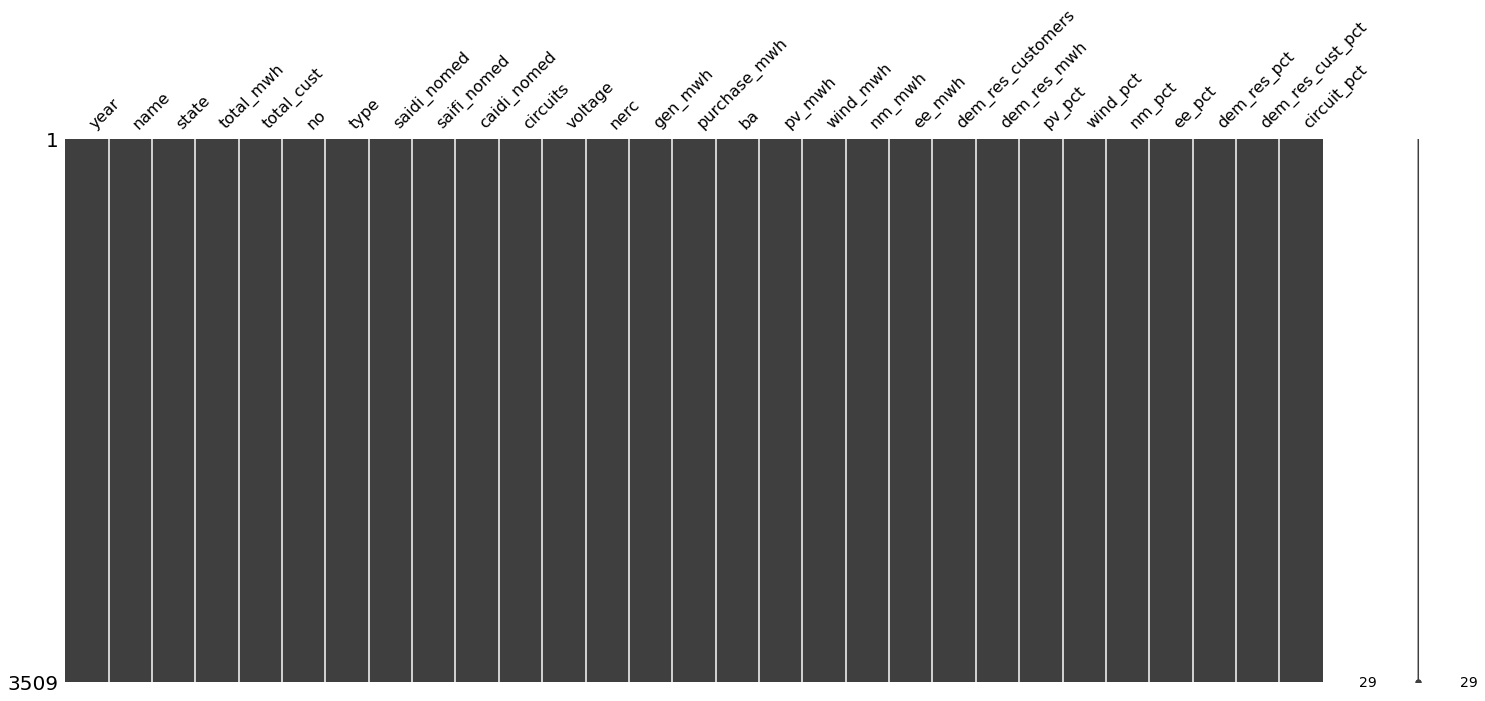

In [179]:
# make sure we're good to go
msno.matrix(df)

In [178]:
# export as CSV so I can use it in my next step
df.to_csv("df.csv",index=False)

### Attempt 4.5: Try alternative method where I drop NA's for just net metering and use that as my only preidctor

In [197]:
df_nm.isna().sum()

year               0
name               0
state              0
total_mwh          0
total_cust         0
no                 0
type               0
saidi_nomed        0
saifi_nomed        0
caidi_nomed        0
circuits           3
voltage            3
nerc               0
gen_mwh            0
purchase_mwh       0
pv_mwh          1868
wind_mwh        1868
nm_mwh          1868
dtype: int64

In [199]:
# drop all rows where there is a missing value in the subset columns
df_nm = df_nm.dropna(axis=0, subset = ['nm_mwh'])

In [200]:
df_nm['pv_pct'] = ((df_nm['pv_mwh']/df_nm['total_mwh']) * 100).fillna(0)

In [201]:
df_nm['wind_pct'] = ((df_nm['wind_mwh']/df_nm['total_mwh']) * 100).fillna(0)

In [202]:
df_nm['nm_pct'] = ((df_nm['nm_mwh']/df_nm['total_mwh']) * 100).fillna(0)

In [206]:
df_nm['voltage'] = pd.to_numeric(df_nm['voltage'], errors='coerce')

In [207]:
df_nm['circuits'] = pd.to_numeric(df_nm['circuits'], errors='coerce')

In [208]:
df_nm['circuit_pct'] = ((df_nm['voltage']/df_nm['circuits']) * 100).fillna(0)

In [ ]:
# somehow this process left more voltage missing values than before?

In [214]:
df_nm = df_nm[(df_nm.saidi_nomed != '.')]

In [215]:
df_nm.isna().sum()

year              0
name              0
state             0
total_mwh         0
total_cust        0
no                0
type              0
saidi_nomed       0
saifi_nomed       0
caidi_nomed       0
circuits          2
voltage         304
nerc              0
gen_mwh           0
purchase_mwh      0
pv_mwh            0
wind_mwh          0
nm_mwh            0
pv_pct            0
wind_pct          0
nm_pct            0
circuit_pct       0
dtype: int64

In [217]:
len(df_nm.state.unique())

50

In [219]:
df_nm.to_csv("./processed_data/df_nm.csv",index=False)

## Unresolved pile

In [ ]:
# when we mergeed our dataframes, they dropped all the adjustments
# we decide to ignore these based on expert feedback
net_metering_18[net_metering_18['name'].str.contains("Adjustment")]

# Discard pile

I tried to make a function to automate all of this, but it is just taking too long

In [ ]:
#net_metering = pd.DataFrame()
# for year in range(2015,2020):
#     df = pd.read_excel("Data/Net_Metering_{}.xlsx".format(year), header = [0,1,2])
#     df.columns = df.columns.map(' - '.join)
#     net_metering = net_metering.append(df)

In [ ]:
#net_metering = net_metering.rename(columns={"Utility Characteristics - Unnamed: 0_level_1 - Data Year": "Year"})

In [ ]:
#net_metering.Year.unique()

In [ ]:
#rel_ut = reliability_18.merge(utility_18, on = ["name","state"])

In [ ]:
#rel_ut.merge(utility_18, on = ["name","state"])

In [ ]:
# was going to use to merge columns but not necessary
#cols = [col for col in net_metering_18.columns if 'Unnamed:' not in col]